# Preprocessing
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos

Para limpiar el conjunto de datos, es necesario manejar los valores que faltan y las features categóricas, porque la matemática subyacente en la mayoría de los modelos de Machine Learning asume que los datos son numéricos y no contienen valores desconocidos.
Además, la librería Scikit Learn devuelve un error si se intenta entrenar un modelo como Regresión Lineal o Regresión Logística utilizando datos que contienen valores perdidos o no numéricos.
Es por ello que en este notebook vamos a trabajar con:

* Valores missing
* Datos categóricos
* Escalado y normalización

## 1. Valores missing

La falta de datos es quizás el rasgo más común de los datos impuros. Estos valores suelen tomar la forma de NaN o None.

Hay varias maneras de rellenar los valores que faltan:

* Puedes eliminar las líneas con los datos si el conjunto de datos es lo suficientemente grande y el porcentaje de valores perdidos es alto, más del 50%, por ejemplo.
* Puedes rellenar todas las variables nulas con 0, si se trata de valor numéricos.
* Puedes rellenar los valores perdidos con la media, la mediana o la moda (que es el valor más frecuente de la columna).
* También puedes decidir rellenar los valores que faltan con cualquier valor que venga directamente después en la misma columna.

* Estas decisiones dependen del tipo de datos, de lo que se quiera hacer con ellos y de la causa de la falta de valores. En realidad, el hecho de que algo sea popular no significa necesariamente que sea la elección correcta. La estrategia más común es utilizar el valor medio, pero dependiendo de los datos, se puede llegar a un enfoque totalmente diferente.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

df_missing=pd.read_excel("data/Sample - Superstore.xls",sheet_name="Missing")
df_missing.head()

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840


In [2]:
df_missing.values

array([['Brosina Hoffman', nan, 1706.1840000000002, 9.0, 0.2,
        85.3091999999998],
       ['Brosina Hoffman', 'Phones', 911.424, 4.0, 0.2,
        68.35680000000002],
       ['Zuschuss Donatelli', 'Art', 8.56, 2.0, 0.0, 2.4823999999999993],
       ['Zuschuss Donatelli', 'Phones', nan, 3.0, 0.2, 16.01099999999998],
       ['Zuschuss Donatelli', 'Binders', 22.72, 4.0, 0.2,
        7.383999999999999],
       ['Eric Hoffmann', 'Binders', 11.648000000000001, nan, 0.2, 4.2224],
       ['Eric Hoffmann', 'Accessories', 90.57000000000001, 3.0, 0.0,
        11.774100000000004],
       ['Ruben Ausman', nan, 77.88, 2.0, 0.0, nan],
       [nan, 'Accessories', 13.98, 2.0, 0.0, 6.151200000000001],
       ['Kunst Miller', 'Binders', 25.824, 6.0, 0.2, 9.3612],
       ['Kunst Miller', 'Paper', 146.73, 3.0, 0.0, 68.9631]], dtype=object)

In [3]:
df_missing.isnull()

,Customer,Product,Sales,Quantity,Discount,Profit
0,False,True,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,True,False,False
6,False,False,False,False,False,False
7,False,True,False,False,False,True
8,True,False,False,False,False,False
9,False,False,False,False,False,False


In [4]:
df_missing.isnull().sum()

Customer    1
Product     2
Sales       1
Quantity    1
Discount    0
Profit      1
dtype: int64

In [5]:
for c in df_missing.columns:
    miss = df_missing[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

Customer has 1 missing value(s)
Product has 2 missing value(s)
Sales has 1 missing value(s)
Quantity has 1 missing value(s)
Discount has NO missing value!
Profit has 1 missing value(s)


### Rellenado de valores nulos

In [6]:
df_missing.fillna('FILL')

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,FILL,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.56,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,FILL,3.0,0.2,16.011
4,Zuschuss Donatelli,Binders,22.72,4.0,0.2,7.384
5,Eric Hoffmann,Binders,11.648,FILL,0.2,4.2224
6,Eric Hoffmann,Accessories,90.57,3.0,0.0,11.7741
7,Ruben Ausman,FILL,77.88,2.0,0.0,FILL
8,FILL,Accessories,13.98,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612


In [7]:
df_missing[['Customer','Product']].fillna('FILL')

,Customer,Product
0,Brosina Hoffman,FILL
1,Brosina Hoffman,Phones
2,Zuschuss Donatelli,Art
3,Zuschuss Donatelli,Phones
4,Zuschuss Donatelli,Binders
5,Eric Hoffmann,Binders
6,Eric Hoffmann,Accessories
7,Ruben Ausman,FILL
8,FILL,Accessories
9,Kunst Miller,Binders


In [8]:
df_missing['Sales'].fillna(method='ffill')

0     1706.184
1      911.424
2        8.560
3        8.560
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

In [9]:
df_missing['Sales'].fillna(method='bfill')

0     1706.184
1      911.424
2        8.560
3       22.720
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

In [10]:
df_missing['Sales'].fillna(df_missing.mean()['Sales'])

C:\Users\ADRIN~1\AppData\Local\Temp/ipykernel_13204/1186702620.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_missing['Sales'].fillna(df_missing.mean()['Sales'])


0     1706.184
1      911.424
2        8.560
3      301.552
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

Busca información sobre los calculadores SimpleImputer y IterativeImputer. ¿Para qué sirven?

### Borrado de valores nulos

In [11]:
# only drop rows where all columns are NaN
df_missing.dropna(how='all')

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,Binders,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
7,Ruben Ausman,NaN,77.880,2.0,0.0,NaN
8,NaN,Accessories,13.980,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612


In [12]:
# drop rows that do not have at least 4 non-NaN values
df_missing.dropna(thresh=4)

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,Binders,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
7,Ruben Ausman,NaN,77.880,2.0,0.0,NaN
8,NaN,Accessories,13.980,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612


In [13]:
# only drop rows where NaN appear in specific columns (here: 'Sales')
df_missing.dropna(subset=['Sales'])

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,NaN,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,Binders,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
7,Ruben Ausman,NaN,77.880,2.0,0.0,NaN
8,NaN,Accessories,13.980,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612
10,Kunst Miller,Paper,146.730,3.0,0.0,68.9631


In [14]:
df_missing.dropna(axis=0)

,Customer,Product,Sales,Quantity,Discount,Profit
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.560,2.0,0.0,2.4824
4,Zuschuss Donatelli,Binders,22.720,4.0,0.2,7.3840
6,Eric Hoffmann,Accessories,90.570,3.0,0.0,11.7741
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612
10,Kunst Miller,Paper,146.730,3.0,0.0,68.9631


In [15]:
df_missing.dropna(axis=1)

,Discount
0,0.2
1,0.2
2,0.0
3,0.2
4,0.2
5,0.2
6,0.0
7,0.0
8,0.0
9,0.2


In [16]:
df_missing.dropna(axis=1,thresh=10)

,Customer,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,90.570,3.0,0.0,11.7741
7,Ruben Ausman,77.880,2.0,0.0,NaN
8,NaN,13.980,2.0,0.0,6.1512
9,Kunst Miller,25.824,6.0,0.2,9.3612


## 2. Datos categóricos

En Machine Learning solo utilizamos valores numéricos, tipo de datos flotantes o enteros. Sin embargo, los conjuntos de datos a menudo contienen el objeto como tipo de datos, por lo tanto se hace necesario transformarlo en numérico. En la mayoría de los casos, los valores categóricos son discretos y puedes ser codificados como variables ficticias, asignando un número para cada categoría.
[Tutorial DataCamp super completo](https://www.datacamp.com/community/tutorials/categorical-data)

In [31]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Sustitución de los valores de la columna size por valores numéricos concretos

In [32]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### Sustitución de los valores de la columna classlabel con un LabelEncoder

In [33]:
df['classlabel'].unique()

array(['class1', 'class2'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()
df['classlabel'] = class_label_encoder.fit_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


### Sustitución de los valores de la columna color con una columna para cada color

In [35]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


Busca más información sobre otras transformaciones de datos categóricos y pon ejemplos sobre este df [Tutorial DataCamp super completo](https://www.datacamp.com/community/tutorials/categorical-data)

## 3. Escalado y normalización

La escala es importante si necesitas especificar que una modificación en una cantidad no es igual a otra modificación en otra. Con la ayuda del escalado, te aseguras de que aunque algunas características son grandes no se usarán como predictor principal. Por ejemplo, si se utiliza la edad y el salario de una persona en la predicción, algunos algoritmos prestarán más atención al salario porque es más grande, lo que no tiene ningún sentido.

La normalización implica transformar o convertir el conjunto de datos en una distribución normal. Algunos algoritmos como SVM convergen mucho más rápido en los datos normalizados, por lo que tiene sentido normalizar los datos para obtener mejores resultados.

Hay muchas maneras de realizar el escalado de características. En pocas palabras, ponemos todas nuestras características en la misma escala para que ninguna esté dominada por otra.

In [36]:
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [37]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
len(X_test), len(X_train)

(54, 124)

### MinMaxScaler
Normalización de un vector suele significar dividir por una norma del vector. También se refiere a menudo al cambio de escala por el mínimo y el rango del vector, para hacer que todos los elementos se encuentren entre 0 y 1, lo que lleva todos los valores de las columnas numéricas del conjunto de datos a una escala común.. Escala cada variable de entrada al rango 0-1.

el objetivo de la normalización es cambiar los valores de las columnas numéricas en el conjunto de datos a una escala común, sin distorsionar las diferencias en los rangos de valores. Para el aprendizaje automático, todos los conjuntos de datos no requieren normalización. Solo se requiere cuando las funciones tienen diferentes rangos.

Por ejemplo, considere un conjunto de datos que contiene dos características, edad e ingresos (x2). Donde la edad varía de 0 a 100, mientras que los ingresos varían de 0 a 100 000 y más. Los ingresos son unas 1.000 veces mayores que la edad. Entonces, estas dos características están en rangos muy diferentes. Cuando hacemos más análisis, como la regresión lineal multivariante, por ejemplo, el ingreso atribuido influirá intrínsecamente más en el resultado debido a su mayor valor. Pero esto no significa necesariamente que sea más importante como predictor. Entonces normalizamos los datos para traer todas las variables al mismo rango.

La normalización es una buena técnica para usar cuando no conoce la distribución de sus datos o cuando sabe que la distribución no es gaussiana (una curva de campana). La normalización es útil cuando sus datos tienen escalas variables y el algoritmo que está utilizando no hace suposiciones sobre la distribución de sus datos, como k vecinos más cercanos y redes neuronales artificiales.

In [38]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [39]:
X_train_norm[0]

array([0.72043011, 0.20378151, 0.53763441, 0.30927835, 0.33695652,
       0.54316547, 0.73700306, 0.25      , 0.40189873, 0.24068768,
       0.48717949, 1.        , 0.5854251 ])

In [40]:
X_test_norm[0]

array([0.72849462, 0.16386555, 0.47849462, 0.29896907, 0.52173913,
       0.53956835, 0.74311927, 0.13461538, 0.37974684, 0.4364852 ,
       0.32478632, 0.70695971, 0.60566802])

In [41]:
X_train_norm[0]

array([0.72043011, 0.20378151, 0.53763441, 0.30927835, 0.33695652,
       0.54316547, 0.73700306, 0.25      , 0.40189873, 0.24068768,
       0.48717949, 1.        , 0.5854251 ])

### StandardScaler
Estandarización de un vector generalmente significa restar una medida de ubicación y dividir por una medida de escala. Por ejemplo, si el vector contiene valores aleatorios con una distribución gaussiana, puede restar la media y dividir por la desviación estándar, obteniendo así una variable aleatoria "normal estándar" con media 0 y desviación estándar 1.. Escala cada variable de entrada para tener una media de 0,0 y una desviación estándar de 1,0.
**Aplicar a las variables de tipo Gaussiano**.

La estandarización de las características alrededor del centro y 0 con una desviación estándar de 1 es importante cuando comparamos medidas que tienen diferentes unidades. Las variables que se miden a diferentes escalas no contribuyen por igual al análisis y podrían terminar creando una base.

Por ejemplo, una variable que oscila entre 0 y 1000 tendrá más peso que una variable que oscila entre 0 y 1. El uso de estas variables sin estandarización dará a la variable con el rango más grande un peso de 1000 en el análisis. Transformar los datos a escalas comparables puede evitar este problema. Los procedimientos típicos de estandarización de datos igualan el rango y / o la variabilidad de los datos.

La estandarización asume que sus datos tienen una distribución gaussiana (curva de campana). Esto no tiene por qué ser estrictamente cierto, pero la técnica es más eficaz si su distribución de atributos es gaussiana. La estandarización es útil cuando sus datos tienen escalas variables y el algoritmo que está utilizando hace suposiciones acerca de que sus datos tienen una distribución gaussiana, como regresión lineal, regresión logística y análisis discriminante lineal.

In [42]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [43]:
X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

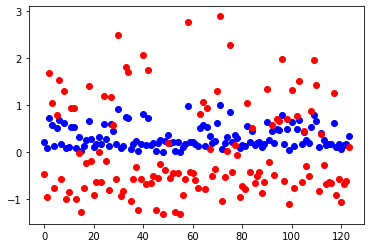

In [45]:
import matplotlib.pyplot as plt

xx = np.arange(len(X_train_std))
yy1 = X_train_norm[:,1]
yy2 = X_train_std[:,1]
plt.scatter(xx, yy1, color='b')
plt.scatter(xx, yy2, color='r')